In [4]:
pip install librosa


  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=6973eddd5885f624fe3df5a80c09920e5eeefb5efae738490198679b1e39a336
  Stored in directory: c:\users\shreya\appdata\local\pip\cache\wheels\de\1e\aa\d91797ae7e1ce11853ee100bee9d1781ae9d750e7458c95afb
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=23095 sha256=ebc8db551eb8290961c13ff6a7b7d23939cab007d54f182e93b1dffb7768ca3b
  Stored in directory: c:\users\shreya\appdata\local\pip\cache\wheels\cd\85\04\704a589ef8773d1ec1393c4b271a023f929d85ef5317b12d8c
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320723 sha256=063ecc2d0a61b34c1ac446b499072267c7568171bbbb943254da02349148a1ad
  Stored in directory: c:\users\shreya\appdata\local\pip\cache\wheels\a0\18\0a\8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built librosa audioread resampy
Note: you may need to restart the kernel to 

In [5]:
import librosa as lt

In [6]:
import numpy as np
import time
import os
path = r'C:\Users\shreya\Downloads\107620_256618_bundle_archive'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
            X, sample_rate = lt.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(lt.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
            file = int(file[7:8]) - 1 
            arr = mfccs, file
            lst.append(arr)
      # If the file is not valid, skip it
        except ValueError:
             continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 932.27943110466 seconds ---


In [7]:
X, y = zip(*lst)

In [8]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((4904, 40), (4904,))

In [9]:
import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = r'C:\Users\shreya\Downloads\107620_256618_bundle_archive'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [10]:
import joblib
X = joblib.load(r'C:\Users\shreya\Downloads\107620_256618_bundle_archive/X.joblib')
y = joblib.load(r'C:\Users\shreya\Downloads\107620_256618_bundle_archive/y.joblib')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       127
           1       0.85      0.91      0.88       232
           2       0.83      0.82      0.83       259
           3       0.83      0.81      0.82       248
           4       0.93      0.88      0.90       262
           5       0.82      0.83      0.83       223
           6       0.80      0.76      0.78       124
           7       0.74      0.78      0.76       144

    accuracy                           0.84      1619
   macro avg       0.83      0.83      0.83      1619
weighted avg       0.84      0.84      0.84      1619



In [17]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [18]:

x_traincnn.shape, x_testcnn.shape

((3285, 40, 1), (1619, 40, 1))

In [22]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [25]:
Model=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Train on 3285 samples, validate on 1619 samples
Epoch 1/100
3285/3285 [==============================] - 4s 1ms/sample - loss: 2.8350 - accuracy: 0.2046 - val_loss: 1.7984 - val_accuracy: 0.2502
Epoch 2/100
3285/3285 [==============================] - 3s 860us/sample - loss: 1.7054 - accuracy: 0.3306 - val_loss: 1.5993 - val_accuracy: 0.3508
Epoch 3/100
3285/3285 [==============================] - 3s 866us/sample - loss: 1.5077 - accuracy: 0.4146 - val_loss: 1.4454 - val_accuracy: 0.4336
Epoch 4/100
3285/3285 [==============================] - 3s 863us/sample - loss: 1.3548 - accuracy: 0.4825 - val_loss: 1.2462 - val_accuracy: 0.5707
Epoch 5/100
3285/3285 [==============================] - 3s 881us/sample - loss: 1.2564 - accuracy: 0.5303 - val_loss: 1.5282 - val_accuracy: 0.4058
Epoch 6/100
3285/3285 [==============================] - 3s 866us/sample - loss: 1.1877 - accuracy: 0.5473 - val_loss: 1.1848 - val_accuracy: 0.5405
Epoch 7/100
3285/3285 [==============================] - 3s 

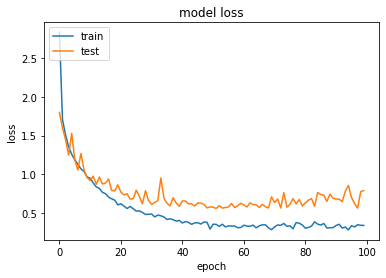

In [27]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

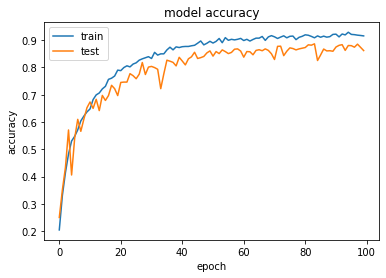

In [28]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:

predictions = model.predict_classes(x_testcnn)

In [30]:
predictions

array([7, 2, 2, ..., 5, 2, 7], dtype=int64)

In [31]:
y_test

array([7, 2, 2, ..., 5, 2, 2])

In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       127
           1       0.84      0.95      0.89       232
           2       0.85      0.80      0.83       259
           3       0.92      0.80      0.86       248
           4       0.89      0.94      0.91       262
           5       0.81      0.85      0.83       223
           6       0.81      0.87      0.84       124
           7       0.90      0.78      0.84       144

    accuracy                           0.86      1619
   macro avg       0.86      0.86      0.86      1619
weighted avg       0.86      0.86      0.86      1619



In [37]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_ytest, predictions)
print (matrix)

[[113   7   2   1   2   0   2   0]
 [  4 221   3   2   0   2   0   0]
 [  5  24 208   0   6   8   1   7]
 [  2   6   2 198   7  25   8   0]
 [  0   2  10   0 245   1   4   0]
 [  4   1   6  12   5 189   4   2]
 [  1   2   4   2   4   0 108   3]
 [  0   0   9   0   7   8   7 113]]


In [39]:
model.save('testing_model.h5')
print("model is saved")


model is saved


In [59]:
from tensorflow import  keras
import numpy as np
import librosa

class livePredictions:

    def __init__(self, path, file):
   
        self.path = path
        self.file = file

    def load_model(self):
      
        self.loaded_model = keras.models.load_model(self.path)
        return self.loaded_model.summary()

    def makepredictions(self):
   
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        predictions = self.loaded_model.predict_classes(x)
        print("Prediction is", " ", self.convertclasstoemotion(predictions))

    @staticmethod
    def convertclasstoemotion(pred):
   
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label

pred = livePredictions(path=r'testing_model.h5',file=r'C:\Users\shreya\Downloads\107620_256618_bundle_archive\audio_speech_actors_01-24\Actor_14\03-01-04-02-02-01-14.wav')

pred.load_model()
pred.makepredictions()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

In [58]:
import IPython.display as ipd

ipd.Audio(r'C:\Users\shreya\Downloads\107620_256618_bundle_archive\audio_speech_actors_01-24\Actor_14\03-01-04-02-02-01-14.wav')


